In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

mpl.style.use('seaborn')
%matplotlib inline

### Criterios del registro
"@MafeCarrascal","@CathyJuvinao","@FabianSanabriaS",
            "@DanielSamperO","@ClaudiaLopez","@AngelicaLozanoC","@AntanasMockus","@ArielAnaliza",
            "@datoatipico","@Rivas_Santiago","@Uriasv","@cielo_rusinque","@MeDicenWally",
            "@intiasprilla","@navarrowolff","@angelamrobledo","@DavidRacero","@MirandaBogota",
            "@MauroToroO","@conycamelo","@eljulisastoque","@JULIOC_HERRERA"
            "@AlvaroUribeVel","@MariaFdaCabal","@natiibedoya",
            "@CatalinaSuarezB","@MiguelPoloP"

# Loader


In [2]:
#get users and mentions from the download files:
tweets_datas_path = ["cuentas_tweets_0.json","cuentas_tweets_1.json"]
tw_id=[]
tw_user_id=[]
tw_user=[]
# tw_text=[]
entities_long=[]
mentioned_ids=[]
tw_device=[]# print(twits[rnd_ind]["source"])
tw_date=[]# print(twits[rnd_ind]["created_at"])


for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
#                 if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
#                     tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                     tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                     entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                 else:
#                     if tweet["text"][0:2]=="RT":
#                         if tweet["retweeted_status"]["truncated"]:
#                             tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                         else: 
#                             tw_text_loop=[tweet["retweeted_status"]["text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
#                         if tweet["retweeted_status"]["is_quote_status"]:
#                             tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                     else:
#                         tw_text_loop=[tweet["text"]]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                mentioned_ids.append([tweet["id_str"],tweet["user"]["id_str"],list(set([ent["id_str"] for ent in tw_entities]))])
#                 tw_text.append([tweet["id_str"],tw_text_loop])
                tw_device.append(tweet["source"])
                tw_date.append(tweet["created_at"])
            except:
                continue

In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
#       "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 287960 
 Tweets con usuario identificado     : 287960 
 Tweets con nombre de usuario        : 287960 
 Total de Menciones en los tweets    : 819512 
 Tweets con menciones identificadas  : 287960 
 Tweets con dispositivos registrado  : 287960 
 Tweets con fechas registradas       : 287960 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 55990


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    184776
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       55462
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       23878
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  19423
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         3372
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>        254
<a href="https://twitter.com/indirectasrock" rel="nofollow">CabronaGold-2</a>              173
<a href="http://www.twitter.com/noviosicopata" rel="nofollow">CabronaGold-2a</a>           164
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                    131
<a href="http://www.tweetcaster.com" rel="nofollow">TweetCaster for Android</a>             34
<a href="https://twitterrific.com/ios" rel="

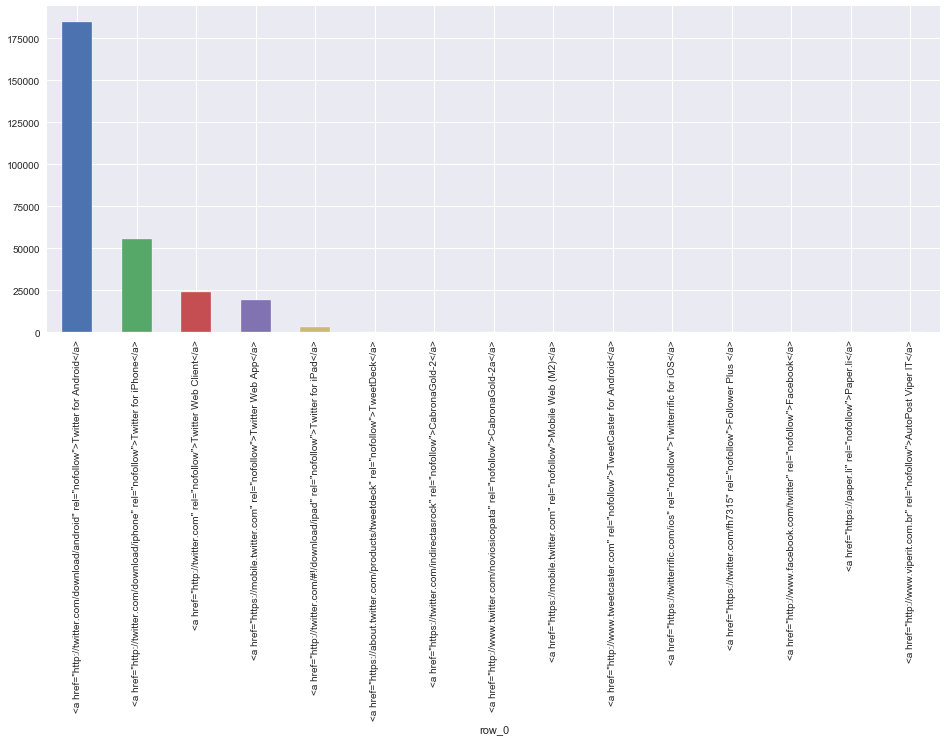

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices[:15].plot(figsize=(16, 6), kind="bar")
devices[:15]

C:\Users\Alexis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


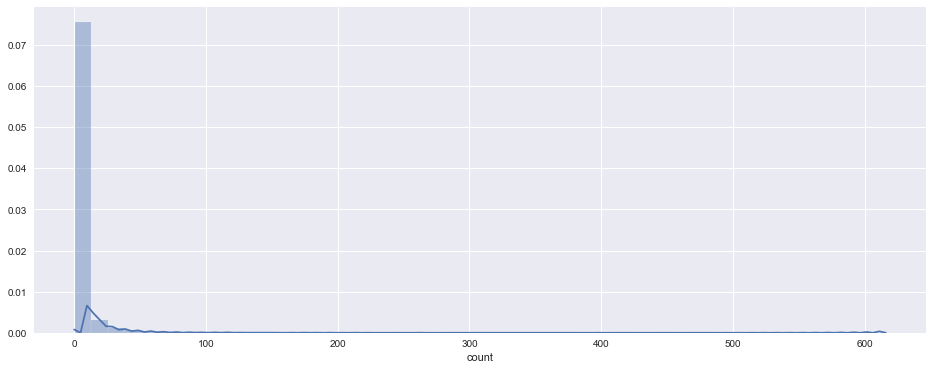

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    55990.000
mean         5.143
std         15.642
min          1.000
25%          1.000
50%          2.000
75%          4.000
max        615.000
Name: count, dtype: float64

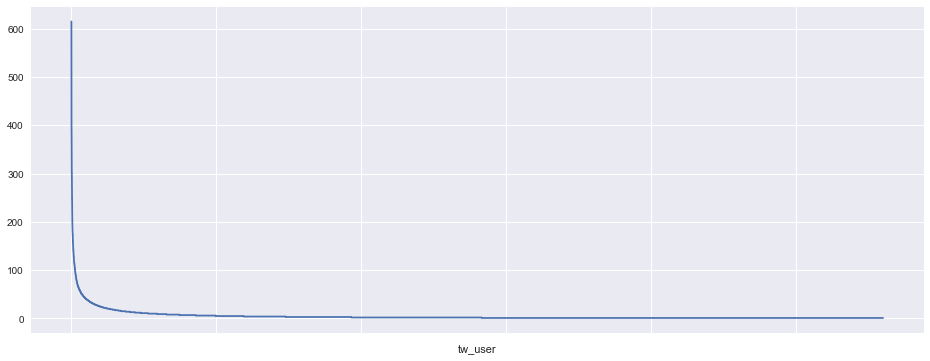

In [8]:
ids_freqs.plot(figsize=(16, 6))

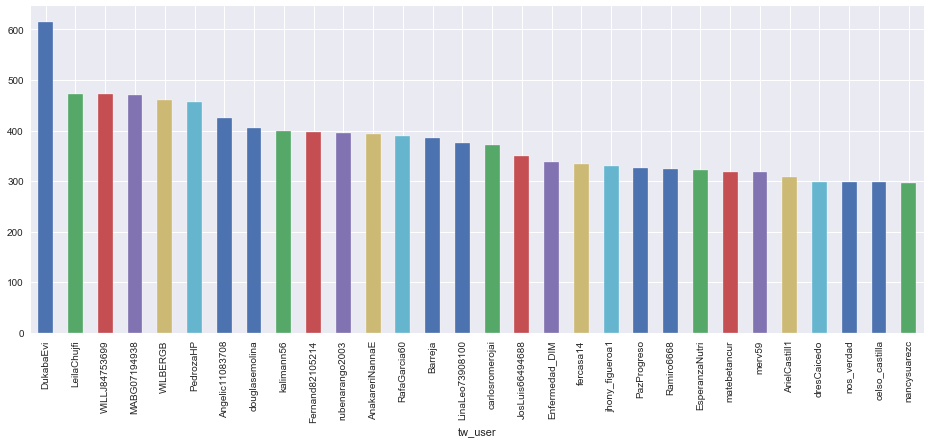

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
DukabaEvi          615
LeilaChujfi        472
WILLJ84753699      472
MABG07194938       470
WILBERGB           461
PedrozaHP          457
Angelic11083708    425
douglasemolina     404
kalimann56         399
Fernand82105214    398
rubenarango2003    395
AnakareriNannaE    394
RafaGarcia60       390
Barreja            386
LinaLeo73908100    375
carlosromerojai    371
JosLuis66494688    350
Enfermedad_DIM     337
fercasa14          333
jhony_figueroa1    329
PazProgreso        326
Ramiro6668         324
EsperanzaNutri     321
matebetancur       318
merv59             318
ArielCastill1      308
nos_verdad         299
dresCaicedo        299
celso_castilla     298
nancysuarezc       297
Camava3            295
GLORIDMQ           294
LaArboleda4        293
alejopereira27     284
argkon             276
Colombia_y_yo      271
H_U_V_A            263
8698599j           262
mareba82           261
EdwinGaviria17     260
alfredoboita       258
rafistan73         251
Miryam78151448     250
aar

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

21344

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 21380


# Clustering Nexos¶


In [14]:
# Tabla de ocurrencia de menciones por tuit
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns[2] ]), columns="count").sort_values(ascending=False, by="count")

In [15]:
top_n=300

In [16]:
ments_ids_top=list(id_ments.index[:top_n])

In [17]:
mntns_top_ocurr=np.array([[cand in tw_mntns[2] for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [18]:
mntns_top_ocurr.shape

(287960, 300)

In [19]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [20]:
# twtxt_ids=[txt_id[0] for txt_id in tw_text] # Id del tuit con el texto
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top, index=tw_id)

DanielSamperO      32218
Uriasv             31574
MafeCarrascal      28338
ClaudiaLopez       21194
natiibedoya        16748
IvanDuque          15066
petrogustavo       11610
VickyDavilaH       10995
CathyJuvinao       10028
angelamrobledo      9329
navarrowolff        9043
DavidRacero         7992
MariaFdaCabal       7605
Rivas_Santiago      7549
matadoreltiempo     7164
AngelicaLozanoC     5858
AlvaroUribeVel      5654
FabianSanabriaS     4475
NanyPardo           4119
NubiaSMartinez      4096
dtype: int64


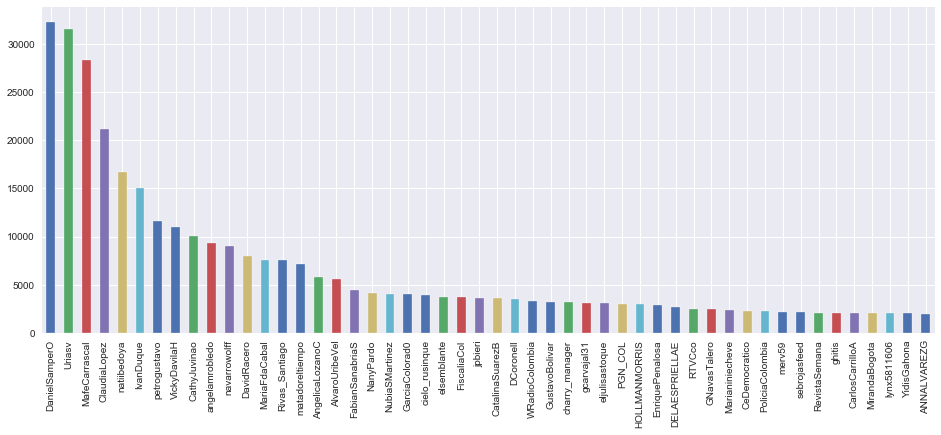

In [21]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

In [22]:
# mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

In [23]:
# #max_d = 10
# plt.figure(figsize=(10,100))
# #plt.figure()
# dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
# #plt.axhline(y=max_d, c='k')
# plt.title('Ward Link Dendrogram por tweets')
# plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
# plt.show()

# Relaciones de cuentas

In [24]:
directed_graph_df=df_mntns_top_ocurr.groupby(tw_user).aggregate(sum)

In [25]:
mntns_ward_usr= hierarchy.linkage(directed_graph_df.transpose(), 'ward')

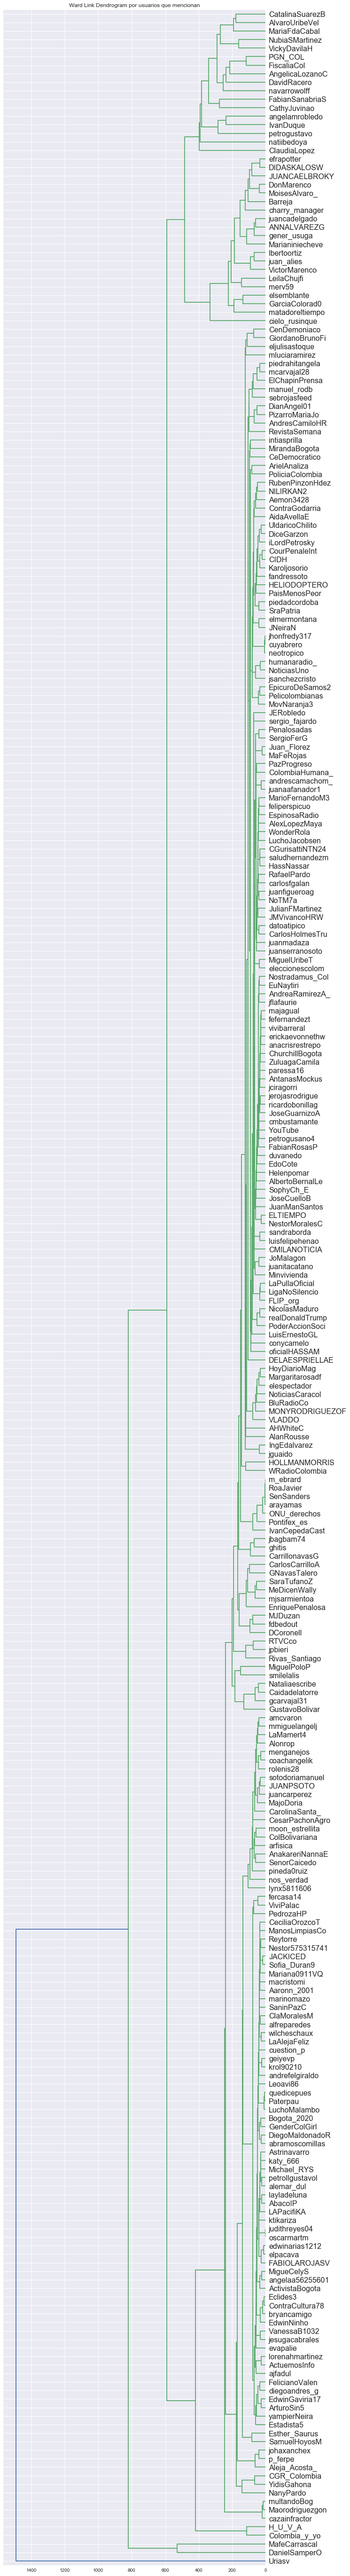

In [26]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward_usr,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram por usuarios que mencionan')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [27]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores tuiteros

LeilaChujfi        1766.0
merv59             1147.0
Barreja            1141.0
WILBERGB            886.0
douglasemolina      869.0
AnakareriNannaE     848.0
DukabaEvi           800.0
WILLJ84753699       785.0
Angelic11083708     736.0
ariasen978          730.0
GLORIDMQ            695.0
MABG07194938        691.0
Fernand82105214     682.0
PedrozaHP           661.0
fercasa14           640.0
H_U_V_A             639.0
Colombia_y_yo       632.0
kalimann56          613.0
rubenarango2003     602.0
LinaLeo73908100     595.0
PazProgreso         586.0
Enfermedad_DIM      586.0
matebetancur        548.0
RafaGarcia60        547.0
JosLuis66494688     544.0
ArielCastill1       529.0
EsperanzaNutri      518.0
Ramiro6668          514.0
carlosromerojai     513.0
nancysuarezc        511.0
wilromerol          506.0
jhony_figueroa1     495.0
ernesto1972m6       493.0
Miryam78151448      492.0
celso_castilla      486.0
Camava3             471.0
maxmaye15354547     469.0
LaArboleda4         458.0
Angel_Zuluag

In [28]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más tuiteados

DanielSamperO      32218.0
Uriasv             31574.0
MafeCarrascal      28338.0
ClaudiaLopez       21194.0
natiibedoya        16748.0
IvanDuque          15066.0
petrogustavo       11610.0
VickyDavilaH       10995.0
CathyJuvinao       10028.0
angelamrobledo      9329.0
navarrowolff        9043.0
DavidRacero         7992.0
MariaFdaCabal       7605.0
Rivas_Santiago      7549.0
matadoreltiempo     7164.0
AngelicaLozanoC     5858.0
AlvaroUribeVel      5654.0
FabianSanabriaS     4475.0
NanyPardo           4119.0
NubiaSMartinez      4096.0
GarciaColorad0      4085.0
cielo_rusinque      3962.0
elsemblante         3752.0
FiscaliaCol         3739.0
jpbieri             3674.0
CatalinaSuarezB     3605.0
DCoronell           3522.0
WRadioColombia      3363.0
GustavoBolivar      3234.0
charry_manager      3200.0
gcarvajal31         3115.0
eljulisastoque      3112.0
PGN_COL             3057.0
HOLLMANMORRIS       2968.0
EnriquePenalosa     2942.0
DELAESPRIELLAE      2659.0
RTVCco              2514.0
G

# Temporalidad

In [29]:
tw_fechas_df=pd.DataFrame(np.column_stack([tw_user,tw_date]))
tw_fechas_df.columns=["user","date_tweet"]
tw_fechas_df["date_tweet"]=pd.to_datetime(tw_fechas_df['date_tweet'], utc=True)#.tz_convert('US/Eastern')
tw_fechas_df.set_index('date_tweet', inplace=True)#.tz_convert('US/Eastern')
tw_fechas_df.index=tw_fechas_df.index.tz_convert('US/Eastern')
tw_fechas_df["ocurr"]=1

In [30]:
time_sample="600S"

In [31]:
tot_tw_fechas=tw_fechas_df.ocurr.resample(time_sample).sum()

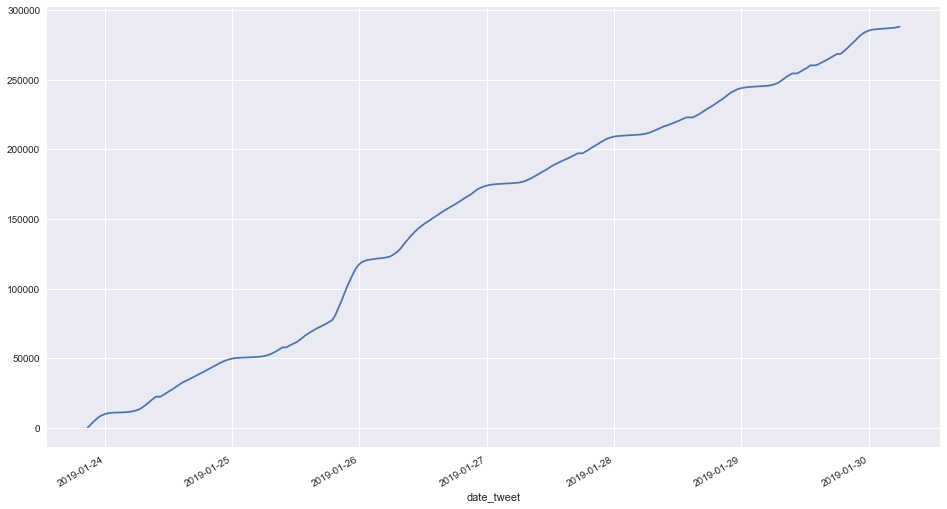

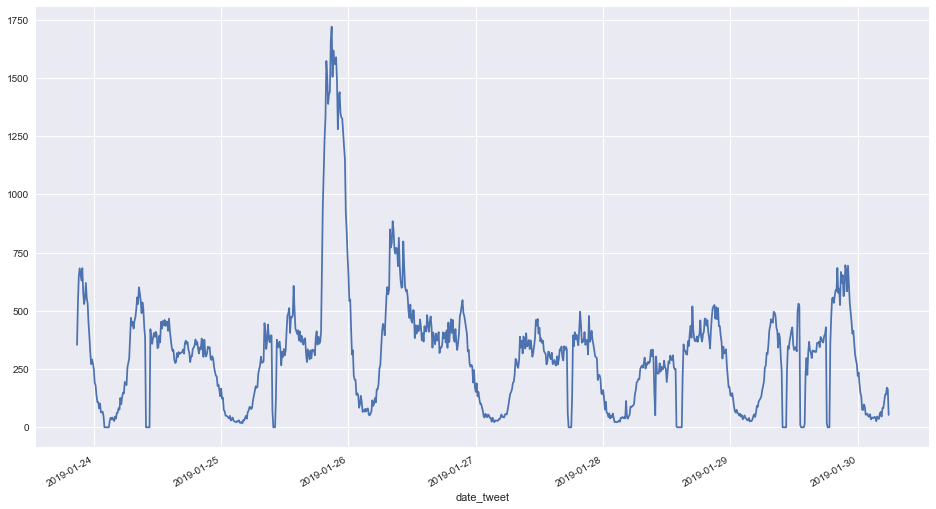

In [32]:
plt.figure(figsize=(16,9))
tot_tw_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_tw_fechas.plot()#kind="bar")
plt.show()

In [33]:
mayor_tweeters=list(directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:10])

In [34]:
tw_fechas_df_top=tw_fechas_df[tw_fechas_df.user.isin(mayor_tweeters)]
#tw_fechas_df_filt.head(20)

In [35]:
twits_filt=pd.crosstab(index=tw_fechas_df_top.index,
                  columns=tw_fechas_df_top["user"])
twits_filt=twits_filt.resample(time_sample).sum()

user
DukabaEvi          615
WILLJ84753699      472
LeilaChujfi        472
WILBERGB           461
Angelic11083708    425
douglasemolina     404
AnakareriNannaE    394
Barreja            386
merv59             318
ariasen978         167
dtype: int64

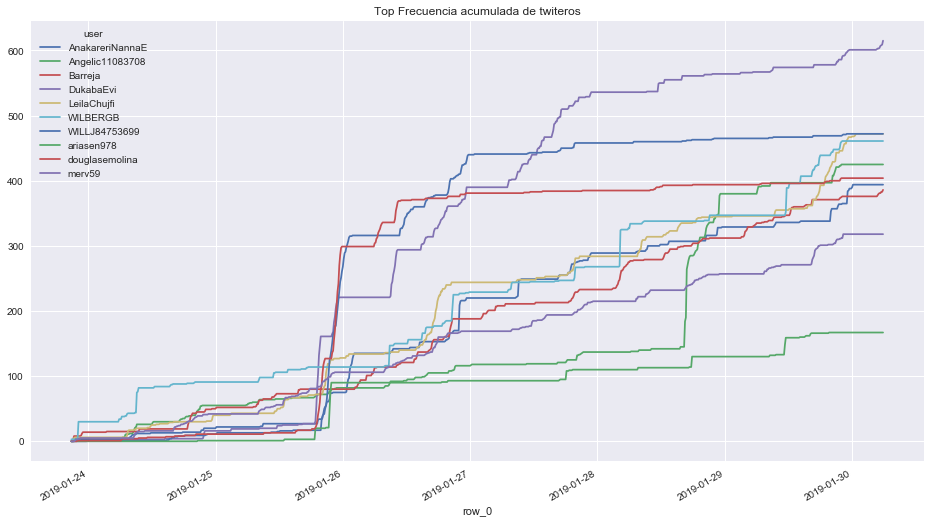

In [36]:
twits_filt.cumsum().plot(figsize=(16,9), title=("Top Frecuencia acumulada de twiteros"))
twits_filt.sum(axis=0).sort_values(ascending=False)[:10]

In [37]:
top_ments_df=df_mntns_top_ocurr.copy()*1
top_ments_df.index=tw_fechas_df.index
# top_ments_df.head(20)

In [38]:
top_ments_df_day=top_ments_df.iloc[:,:10].resample(time_sample).sum()
top_ments_df_day.sum(axis=0)

DanielSamperO     32218
Uriasv            31574
MafeCarrascal     28338
ClaudiaLopez      21194
natiibedoya       16748
IvanDuque         15066
petrogustavo      11610
VickyDavilaH      10995
CathyJuvinao      10028
angelamrobledo     9329
dtype: int64

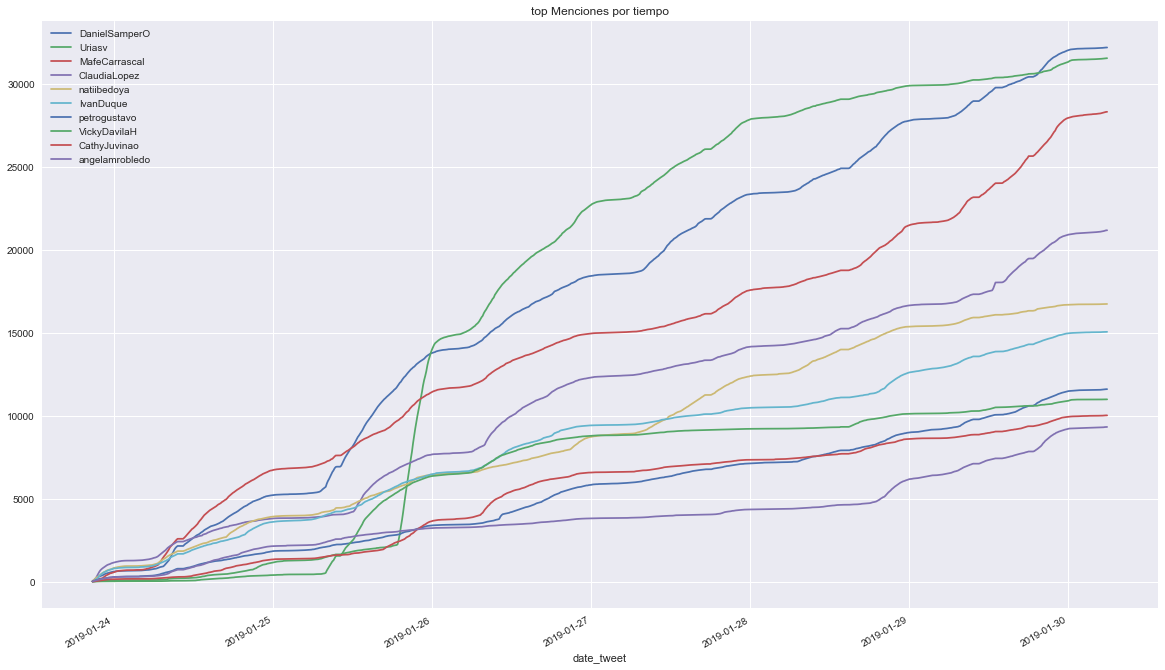

In [39]:
top_ments_df_day.cumsum().plot(figsize=(20,12), title="top Menciones por tiempo")
# (tot_tw_fechas.cumsum()*max(top_ments_df_day.sum(axis=0))/max(tot_tw_fechas.cumsum())).plot(color="black", linestyle='dashed')#kind="bar")

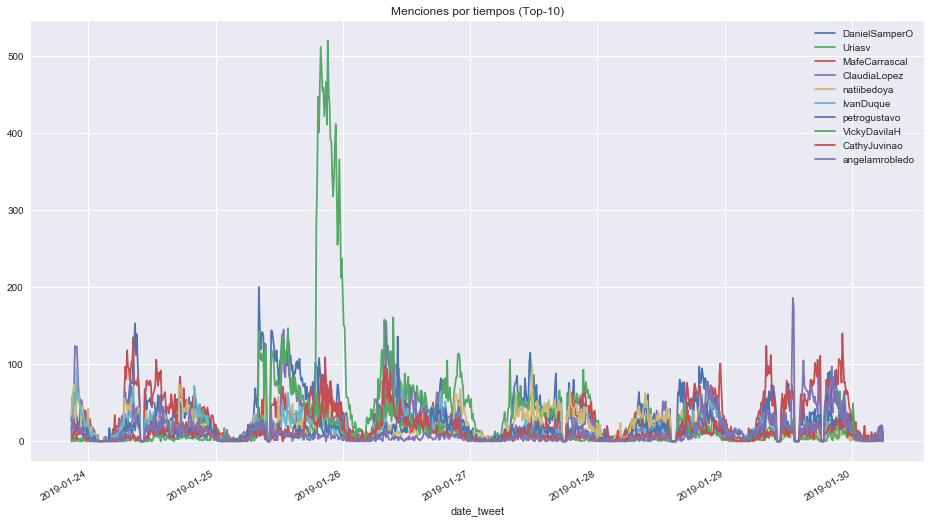

In [40]:
top_ments_df_day.plot(figsize=(16,9), title="Menciones por tiempos (Top-10)")

# Grafos

In [41]:
mat_size=40
graph_mat=directed_graph_df.loc[directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:mat_size],
                                directed_graph_df.sum(axis=0).sort_values(ascending=False).index[:mat_size]
                               ]
graph_mat.head()

,DanielSamperO,Uriasv,MafeCarrascal,ClaudiaLopez,natiibedoya,IvanDuque,petrogustavo,VickyDavilaH,CathyJuvinao,angelamrobledo,...,gcarvajal31,eljulisastoque,PGN_COL,HOLLMANMORRIS,EnriquePenalosa,DELAESPRIELLAE,RTVCco,GNavasTalero,Marianiniecheve,CeDemocratico
LeilaChujfi,42.0,51.0,41.0,4.0,8.0,11.0,64.0,3.0,8.0,7.0,...,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,32.0,1.0
merv59,16.0,22.0,21.0,6.0,0.0,21.0,21.0,0.0,10.0,3.0,...,0.0,6.0,2.0,0.0,0.0,0.0,0.0,4.0,43.0,1.0
Barreja,24.0,35.0,23.0,12.0,5.0,11.0,29.0,8.0,13.0,13.0,...,0.0,16.0,6.0,3.0,0.0,0.0,0.0,3.0,13.0,3.0
WILBERGB,75.0,18.0,112.0,12.0,67.0,9.0,21.0,1.0,52.0,4.0,...,1.0,12.0,31.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0
douglasemolina,6.0,182.0,24.0,3.0,10.0,3.0,5.0,3.0,6.0,1.0,...,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,15.0,1.0


In [42]:
graph_df=graph_mat.melt()
graph_df.columns=["tw_para", "freq"]
graph_df["tw_de"]=[usr for i in range(int(len(graph_df)/len(graph_mat.index)))for usr in list(graph_mat.index)]
graph_df=graph_df.loc[:,["tw_de","tw_para","freq"]]

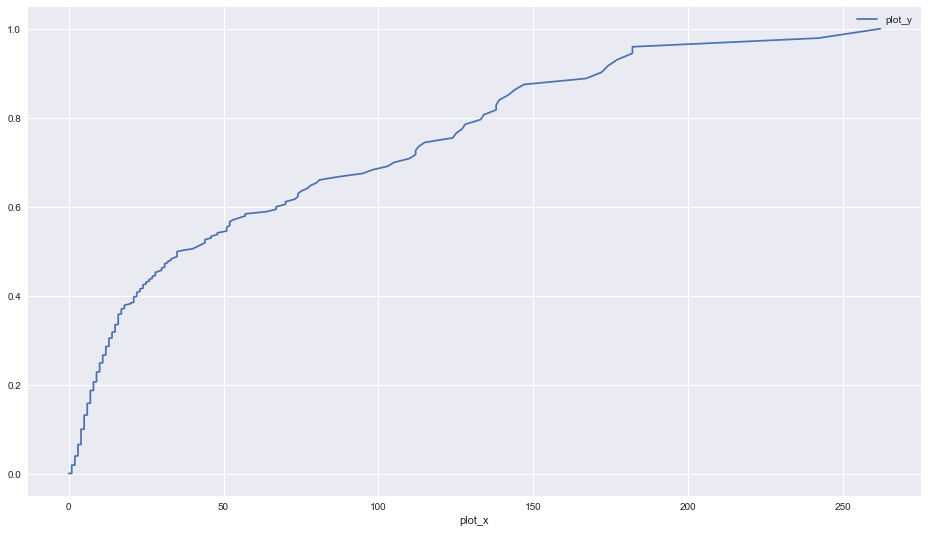

In [43]:
plot_x=np.array(list(graph_df.freq.sort_values(ascending=True)))
plot_y=np.cumsum(plot_x)/sum(plot_x)
cum_freq=pd.DataFrame({"plot_x":plot_x,
                       "plot_y":plot_y})
cum_freq.plot(x="plot_x",
              y="plot_y",
             figsize=(16,9))

In [44]:
min_crit_tw=cum_freq[cum_freq.plot_y>=.4].iloc[0,0]
graph_df_filt=graph_df.loc[graph_df.freq>=min_crit_tw,:]
mx_fr=max(graph_df_filt.freq)
print(min_crit_tw)
print(len(graph_df_filt))
graph_df_filt.sort_values("freq",ascending=False)#.head(20)

22.0
111


,tw_de,tw_para,freq
46,DukabaEvi,Uriasv,262.0
69,nancysuarezc,Uriasv,242.0
53,PedrozaHP,Uriasv,182.0
44,douglasemolina,Uriasv,182.0
688,Angelic11083708,FabianSanabriaS,177.0
840,LeilaChujfi,cielo_rusinque,174.0
47,WILLJ84753699,Uriasv,172.0
51,MABG07194938,Uriasv,167.0
842,Barreja,cielo_rusinque,147.0
68,carlosromerojai,Uriasv,144.0


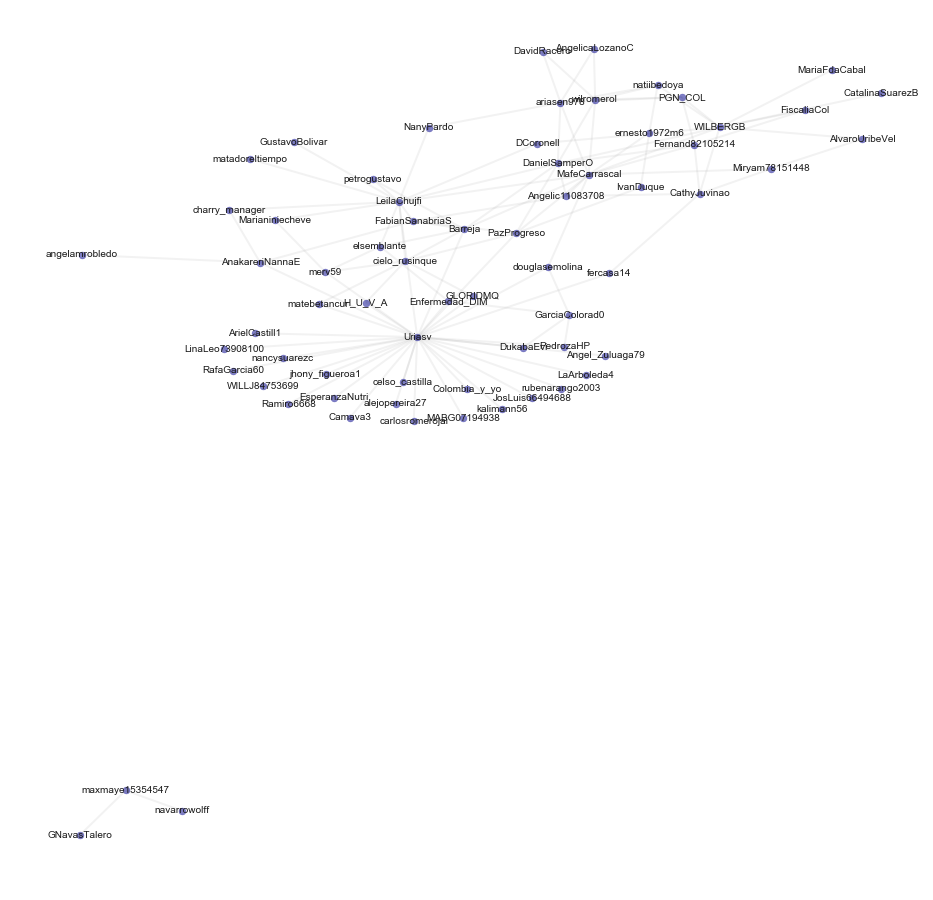

In [45]:
G_2= nx.Graph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in graph_df_filt.iterrows():
    G_2.add_edge(elrow[0], elrow[1])

pos_2 = nx.layout.spring_layout(G_2)

plt.figure(figsize=(16,16))
edges = nx.draw_networkx_edges(G_2, pos_2, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_2, pos_2, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_2, pos_2, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

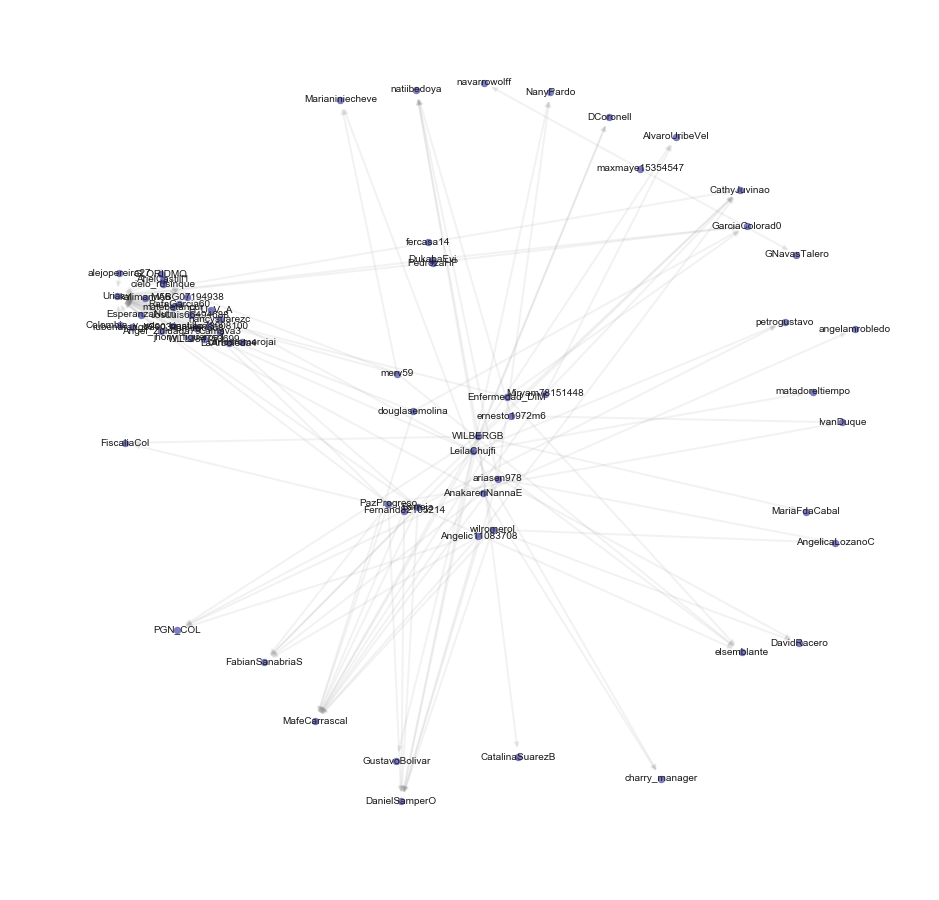

In [46]:
plt.figure(figsize=(16,16))
G_1= nx.DiGraph()
for i, elrow in graph_df_filt.iterrows():
    G_1.add_edge(elrow[0], elrow[1])

pos_1 = nx.layout.spring_layout(G_1)

edges = nx.draw_networkx_edges(G_1, pos_1, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_1, pos_1, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_1, pos_1, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

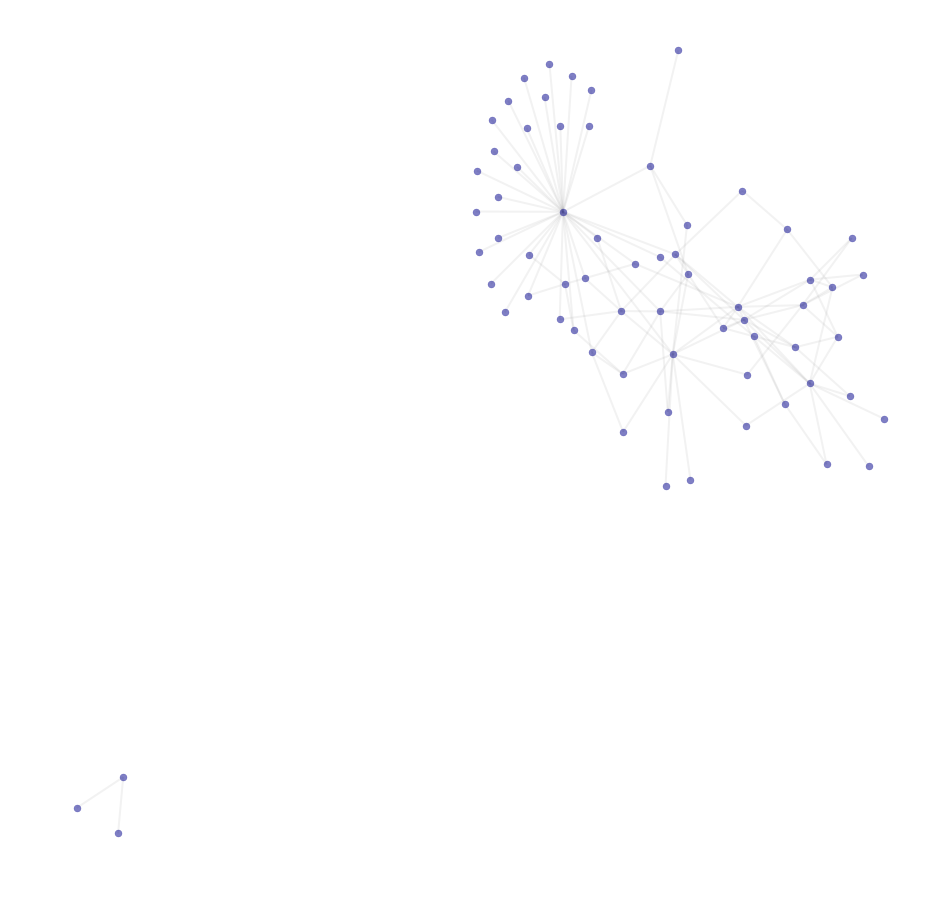

In [47]:
plt.figure(figsize=(16,16))
G_3= nx.Graph()
for i, elrow in graph_df_filt.iterrows():
    G_3.add_edge(elrow[0], elrow[1])

pos_3 = nx.layout.spring_layout(G_3)

edges = nx.draw_networkx_edges(G_3, pos_3, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_3, pos_3, node_size=50, node_color='darkblue', alpha=.5)
# labels = nx.draw_networkx_labels(G_3, pos_3, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()